In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ffn.core as ffn
import bt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 24})
# plots of BT only work with this following command
%matplotlib inline

### Load Baseline

In [2]:
df_baseline = pd.read_csv("../results/backtest/baseline.csv", parse_dates=True, index_col=0)
# df_baseline.plot(figsize=(17,8))

### Load Baseline 2

In [3]:
df_baseline2 = pd.read_csv("../results/backtest/baseline2.csv", parse_dates=True, index_col=0)
# df_baseline.plot(figsize=(17,8))

### Best Deep Policy Gradient

In [4]:
df_dpg = (
    pd.read_csv('../results/backtest/2021_11_09__21_01_31_daily_lr_0.0001_epoch_50000.csv', parse_dates=True, index_col=0)
    .rename(columns={'2021_11_09__21_01_31_daily_lr_0.0001_epoch_50000': 'Deep Policy Gradient'})
)

### Best Actor Critic

In [5]:
df_ac = (
    pd.read_csv('../results/backtest/2021_11_07__11_14_07_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000_sum_loss_True.csv', parse_dates=True, index_col=0)
    .rename(columns={'2021_11_07__11_14_07_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000_sum_loss_True': 'Actor-Critic (Action Value Function)'})
)

### Best Deep Policy Gradient with temporal features

In [6]:
df_dpg_2 = (
    pd.read_csv('../results/backtest/2021_11_13__00_43_22_daily_lr_1e-06_epoch_50000.csv', parse_dates=True, index_col=0)
    .rename(columns={'2021_11_13__00_43_22_daily_lr_1e-06_epoch_50000': 'DPG (Temporal Features)'})
)

### Best Deep Policy Gradient with Temporal Features and Sharpe ratio as Objective 

In [7]:
# name = '2021_11_18__11_54_20_daily_lr_0.001_epoch_10000_metric_sortino'
name = '2021_11_19__08_02_56_daily_lr_0.0001_epoch_30000_metric_sharpe'
df_dpg_3 = (
    pd.read_csv(f'../results/backtest/{name}.csv', parse_dates=True, index_col=0)
    .rename(columns={name: 'DPG (Temporal Features and Sortino)'})
)


### Best Deep Policy Gradient with new Archtecture

In [8]:
name = '2021_11_24__19_46_10_daily_lr_0.0001_epoch_30000_metric_sharpe'
# name = '2021_11_25__15_25_56_daily_lr_0.0001_epoch_30000_metric_sortino'
df_dpg_4 = (
    pd.read_csv(f'../results/backtest/{name}.csv', parse_dates=True, index_col=0)
    .rename(columns={name: 'DPG new Architecture (Temporal Features and Sharpe)'})
)


### Aggregated Results

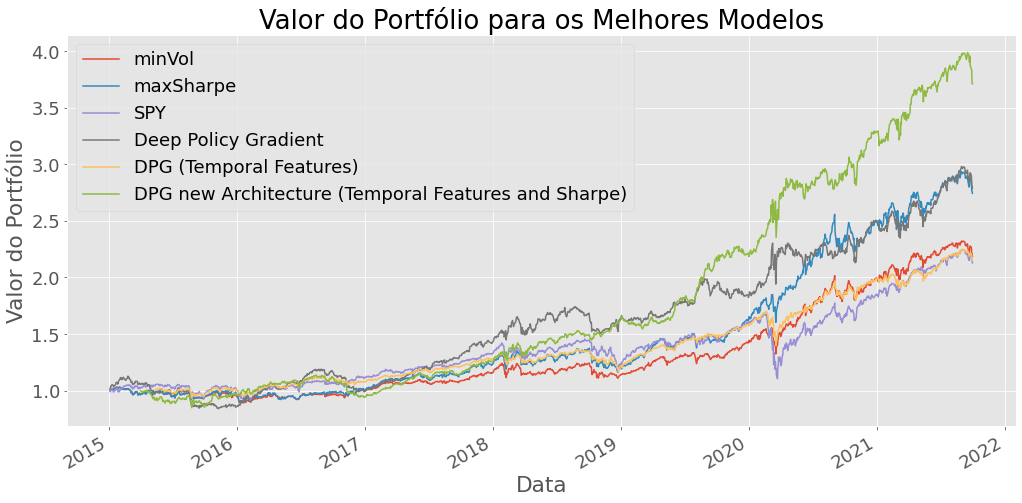

In [9]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 18})

result = pd.concat([
    df_baseline,
    df_dpg,
    df_dpg_2,
    df_dpg_4,
], axis=1)
result.plot(figsize=(17,8))
plt.title('Valor do Portfólio para os Melhores Modelos')
plt.ylabel('Valor do Portfólio')
plt.xlabel('Data')
plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/best_models.png')

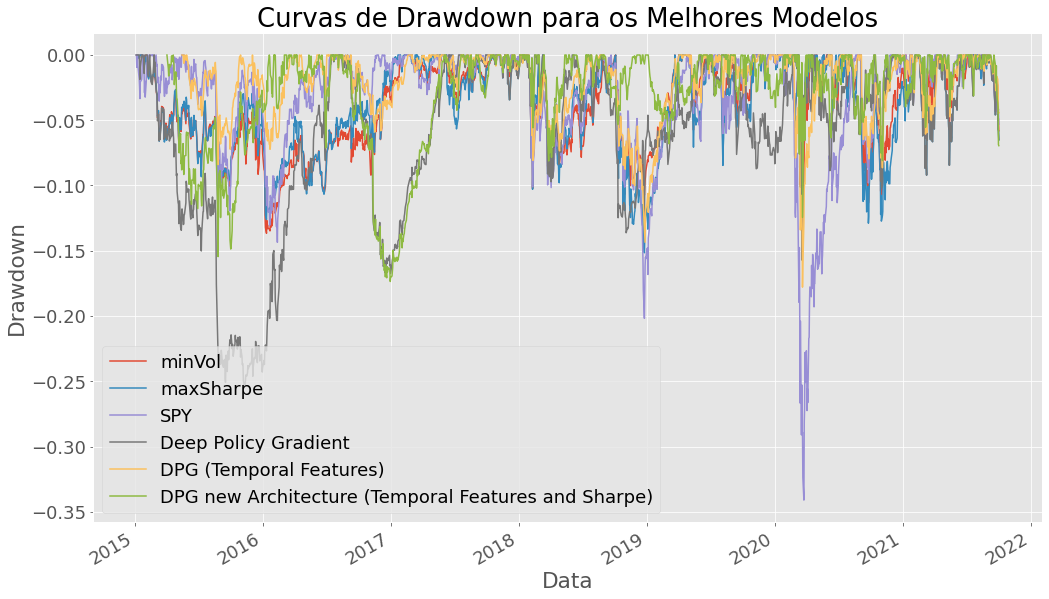

In [12]:
result.to_drawdown_series().plot(figsize=(17,10))
plt.legend(loc='lower left')
plt.title('Curvas de Drawdown para os Melhores Modelos')
plt.ylabel('Drawdown')
plt.xlabel('Data')
plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/best_models_drawdown.png')

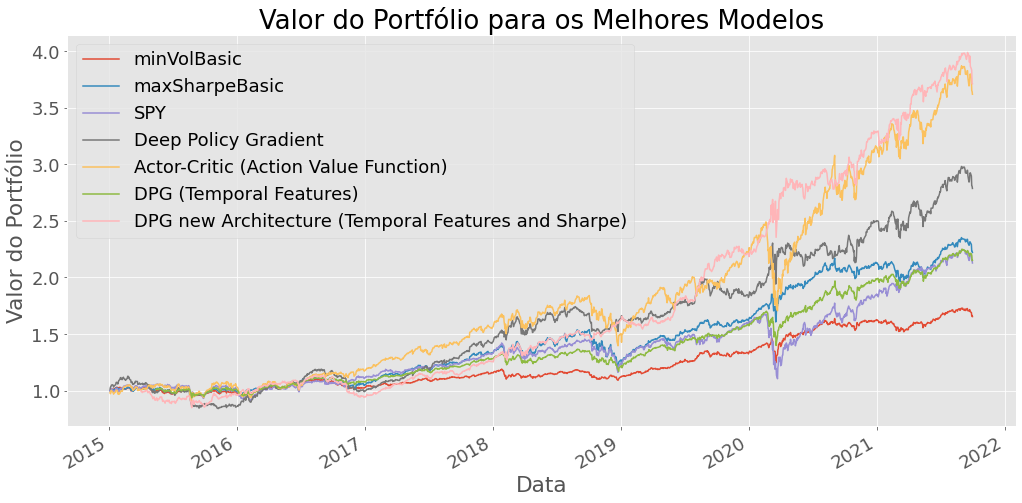

In [12]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 18})

result_basic = pd.concat([
    df_baseline2,
    df_dpg,
    df_ac,
    df_dpg_2,
    df_dpg_4,
], axis=1)
result_basic.plot(figsize=(17,8))
plt.title('Valor do Portfólio para os Melhores Modelos')
plt.ylabel('Valor do Portfólio')
plt.xlabel('Data')
plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/best_models_with_basic.png')

In [14]:
stats_path = '../results/models_finance_stats/best_models.csv'
result.calc_stats().to_csv(sep=';', path=stats_path)

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [15]:
stats_path_basic = '../results/models_finance_stats/best_models_basic.csv'
result_basic.calc_stats().to_csv(sep=';', path=stats_path_basic)

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [4]:
results_stats = pd.read_csv(stats_path, sep=';').drop_duplicates()
results_stats.rename(columns={'Stat': 'Model'}, inplace=True)
results_stats.set_index('Model', drop=True, inplace=True)
# results_stats = results_stats.loc[(results_stats.Stat is None), :]
results_stats = results_stats.transpose()

results_stats.loc[:, ['Total Return', 'Daily Sortino','Daily Sharpe', 'Max Drawdown', 'Monthly Sortino', 'Monthly Sharpe', 'CAGR']]

Model,Total Return,Daily Sortino,Daily Sharpe,Max Drawdown,Monthly Sortino,Monthly Sharpe,CAGR
minVol,121.95%,1.48,0.98,-14.82%,2.56,1.29,13.31%
maxSharpe,177.91%,1.67,1.08,-15.15%,2.79,1.37,17.38%
SPY,102.01%,1.04,0.70,-34.10%,1.42,0.83,11.65%
Deep Policy Gradient,179.98%,1.75,1.07,-17.93%,2.09,1.09,17.51%
Actor-Critic (Action Value Function),244.77%,1.50,0.96,-31.51%,2.48,1.21,21.41%
DPG (Temporal Features),112.97%,1.69,1.09,-17.79%,2.37,1.18,12.58%
DPG new Architecture (Temporal Features and Sharpe),304.12%,2.47,1.48,-17.35%,3.67,1.54,24.47%


In [16]:
results_stats_basic = pd.read_csv(stats_path_basic, sep=';').drop_duplicates()
results_stats_basic.rename(columns={'Stat': 'Model'}, inplace=True)
results_stats_basic.set_index('Model', drop=True, inplace=True)
# results_stats = results_stats.loc[(results_stats.Stat is None), :]
results_stats_basic = results_stats_basic.transpose()

results_stats_basic.loc[:, ['Total Return', 'Daily Sortino','Daily Sharpe', 'Max Drawdown', 'Monthly Sortino', 'Monthly Sharpe', 'CAGR']]

Model,Total Return,Daily Sortino,Daily Sharpe,Max Drawdown,Monthly Sortino,Monthly Sharpe,CAGR
minVolBasic,64.87%,1.45,0.93,-14.82%,2.07,1.00,8.15%
maxSharpeBasic,117.97%,1.52,0.99,-21.11%,2.15,1.13,12.99%
SPY,102.01%,1.04,0.70,-34.10%,1.42,0.83,11.65%
Deep Policy Gradient,179.98%,1.75,1.07,-17.93%,2.09,1.09,17.51%
Actor-Critic (Action Value Function),244.77%,1.50,0.96,-31.51%,2.48,1.21,21.41%
DPG (Temporal Features),112.97%,1.69,1.09,-17.79%,2.37,1.18,12.58%
DPG new Architecture (Temporal Features and Sharpe),304.12%,2.47,1.48,-17.35%,3.67,1.54,24.47%


In [6]:
results_simple = results_stats.loc[:, ['Total Return', 'Daily Sortino','Daily Sharpe', 'Max Drawdown', 'Monthly Sortino', 'Monthly Sharpe', 'CAGR']]
print(results_simple.to_latex())

\begin{tabular}{llllllll}
\toprule
Model & Total Return & Daily Sortino & Daily Sharpe & Max Drawdown & Monthly Sortino & Monthly Sharpe &    CAGR \\
\midrule
minVol                                             &      121.95\% &          1.48 &         0.98 &      -14.82\% &            2.56 &           1.29 &  13.31\% \\
maxSharpe                                          &      177.91\% &          1.67 &         1.08 &      -15.15\% &            2.79 &           1.37 &  17.38\% \\
SPY                                                &      102.01\% &          1.04 &         0.70 &      -34.10\% &            1.42 &           0.83 &  11.65\% \\
Deep Policy Gradient                               &      179.98\% &          1.75 &         1.07 &      -17.93\% &            2.09 &           1.09 &  17.51\% \\
Actor-Critic (Action Value Function)               &      244.77\% &          1.50 &         0.96 &      -31.51\% &            2.48 &           1.21 &  21.41\% \\
DPG (Temporal Features)   